# YOLOv8 Object Detection Demo

This notebook demonstrates how to use the YOLOv8 detection API to perform object detection on images and visualize the results. We'll go through the process step-by-step, providing detailed explanations and visualizations to help you understand and troubleshoot the object detection process.

## What you'll learn:
1. How to prepare an image for the YOLOv8 API
2. How to send requests to the API and interpret the results
3. How to visualize the detection results on the original image
4. How to troubleshoot common issues and adjust parameters for better results

## Step 1: Install Dependencies

First, let's install the required libraries. We'll use:
- `requests` for sending HTTP requests to the API
- `Pillow` for image processing
- `matplotlib` for advanced visualization
- `numpy` for numerical operations

Run the cell below to install these libraries:

In [9]:
!pip install requests Pillow matplotlib numpy

## Step 2: Import Libraries

Now, let's import the necessary libraries and set up our environment:

In [10]:
import base64
import requests
from PIL import Image, ImageDraw, ImageFont
import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Set up matplotlib for inline plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size

## Step 3: Define Helper Functions

We'll define several helper functions to handle different aspects of the object detection process. Each function is explained in detail:

In [11]:
# AI-generated comment: Constants for API endpoint
API_ENDPOINT = "https://yolo.advin.io/Prod/detect"

def encode_image(image_path):
    """Encodes the image file to base64 for API request
    
    Args:
        image_path (str): Path to the image file
    
    Returns:
        str: Base64 encoded image string
    """
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def send_request(encoded_image, conf_thres, iou_thres):
    """Sends a POST request to the API with the encoded image
    
    Args:
        encoded_image (str): Base64 encoded image string
        conf_thres (float): Confidence threshold for detections
        iou_thres (float): IoU threshold for non-maximum suppression
    
    Returns:
        dict: JSON response from the API
    """
    payload = {
        "image": encoded_image,
        "conf_thres": conf_thres,
        "iou_thres": iou_thres,
    }
    response = requests.post(API_ENDPOINT, json=payload)
    return response.json()

def draw_boxes(image, detections):
    """Draws bounding boxes and labels on the image
    
    Args:
        image (PIL.Image): Original image
        detections (list): List of detection dictionaries
    
    Returns:
        PIL.Image: Image with bounding boxes and labels
    """
    draw = ImageDraw.Draw(image)

    # Attempt to load a font, fall back to default if not available
    try:
        font = ImageFont.truetype("arial.ttf", 32)
    except IOError:
        font = ImageFont.load_default()

    for detection in detections:
        x1, y1, x2, y2 = detection["bbox"]
        label = f"{detection['class_name']} {detection['score']:.2f}"

        # Draw green bounding box
        draw.rectangle([x1, y1, x2, y2], outline="green", width=4)

        # Draw label background
        text_bbox = draw.textbbox((x1, y1), label, font=font)
        draw.rectangle(text_bbox, fill="green")

        # Draw white text
        draw.text((x1, y1), label, fill="white", font=font)

    return image

def visualize_detections(image, detections):
    """Visualizes the detections using matplotlib for detailed analysis
    
    Args:
        image (PIL.Image): Original image
        detections (list): List of detection dictionaries
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(np.array(image))
    ax = plt.gca()
    
    for detection in detections:
        x1, y1, x2, y2 = detection["bbox"]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='r', linewidth=2)
        ax.add_patch(rect)
        plt.text(x1, y1, f"{detection['class_name']} {detection['score']:.2f}", 
                 color='w', fontsize=12, backgroundcolor='r')
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def process_image(image_path, conf_thres=0.5, iou_thres=0.5):
    """Process an image and display the results
    
    Args:
        image_path (str): Path to the image file
        conf_thres (float): Confidence threshold for detections
        iou_thres (float): IoU threshold for non-maximum suppression
    """
    # Encode the image
    encoded_image = encode_image(image_path)

    # Send request to API
    response = send_request(encoded_image, conf_thres, iou_thres)

    if "detections" in response:
        # Open the original image
        image = Image.open(image_path)
        
        # Draw bounding boxes on the image
        output_image = draw_boxes(image.copy(), response["detections"])
        
        # Display the original and processed images side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        ax1.imshow(image)
        ax1.set_title("Original Image")
        ax1.axis('off')
        ax2.imshow(output_image)
        ax2.set_title("Detected Objects")
        ax2.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Visualize detections for detailed analysis
        visualize_detections(image, response["detections"])
        
        # Print detection details
        print("Detection Details:")
        for i, detection in enumerate(response["detections"]):
            print(f"Detection {i+1}:")
            print(f"  Class: {detection['class_name']}")
            print(f"  Confidence: {detection['score']:.4f}")
            print(f"  Bounding Box: {detection['bbox']}")
            print()
    else:
        print("Error: No detections found in the API response")
        print("Response:", response)

## Step 4: Process an Image

Now you can use the `process_image` function to detect objects in your images. Make sure to replace `'path/to/your/image.jpg'` with the actual path to your image file.

This function will:
1. Send the image to the YOLOv8 API
2. Display the original image and the image with detected objects side by side
3. Show a detailed visualization of the detections
4. Print out the details of each detection

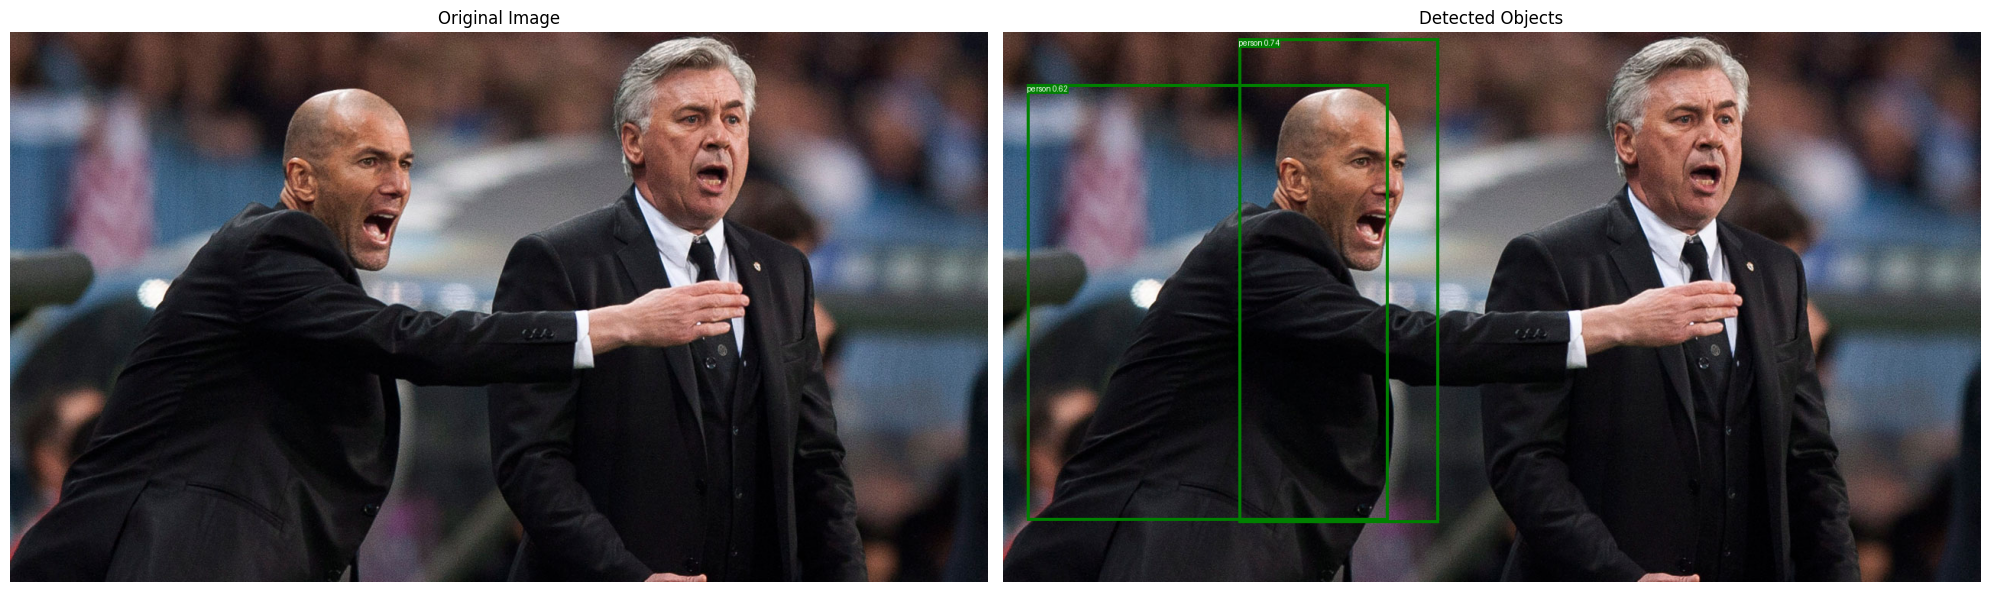

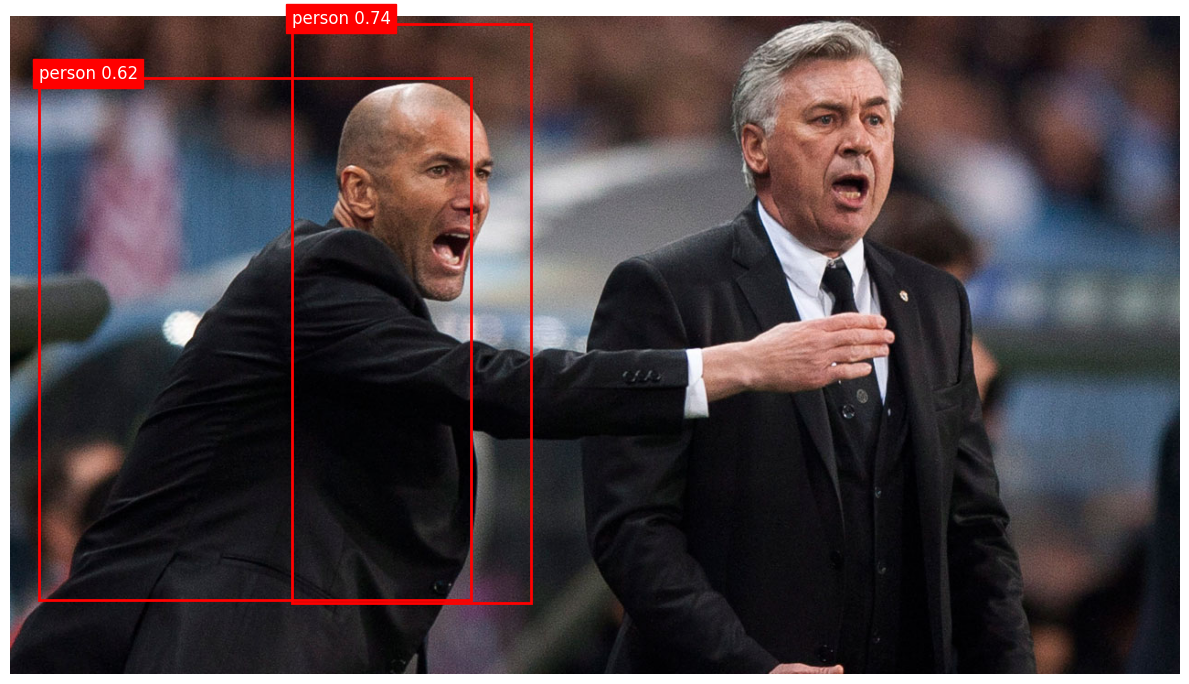

Detection Details:
Detection 1:
  Class: person
  Confidence: 0.7380
  Bounding Box: [308, 8, 570, 642]

Detection 2:
  Class: person
  Confidence: 0.6200
  Bounding Box: [31, 68, 504, 639]



In [12]:
# Replace with your image path
image_path = 'images/zidane.jpg'

# Process the image
process_image(image_path)

## Step 5: Try Different Parameters

You can adjust the confidence threshold and IoU threshold to see how it affects the detection results. 

- **Confidence threshold**: This determines how confident the model needs to be to report a detection. A higher value will result in fewer but more confident detections.
- **IoU threshold**: This affects the non-maximum suppression process, which removes overlapping bounding boxes. A higher value allows more overlapping boxes.

Try adjusting these values and see how it changes the results:

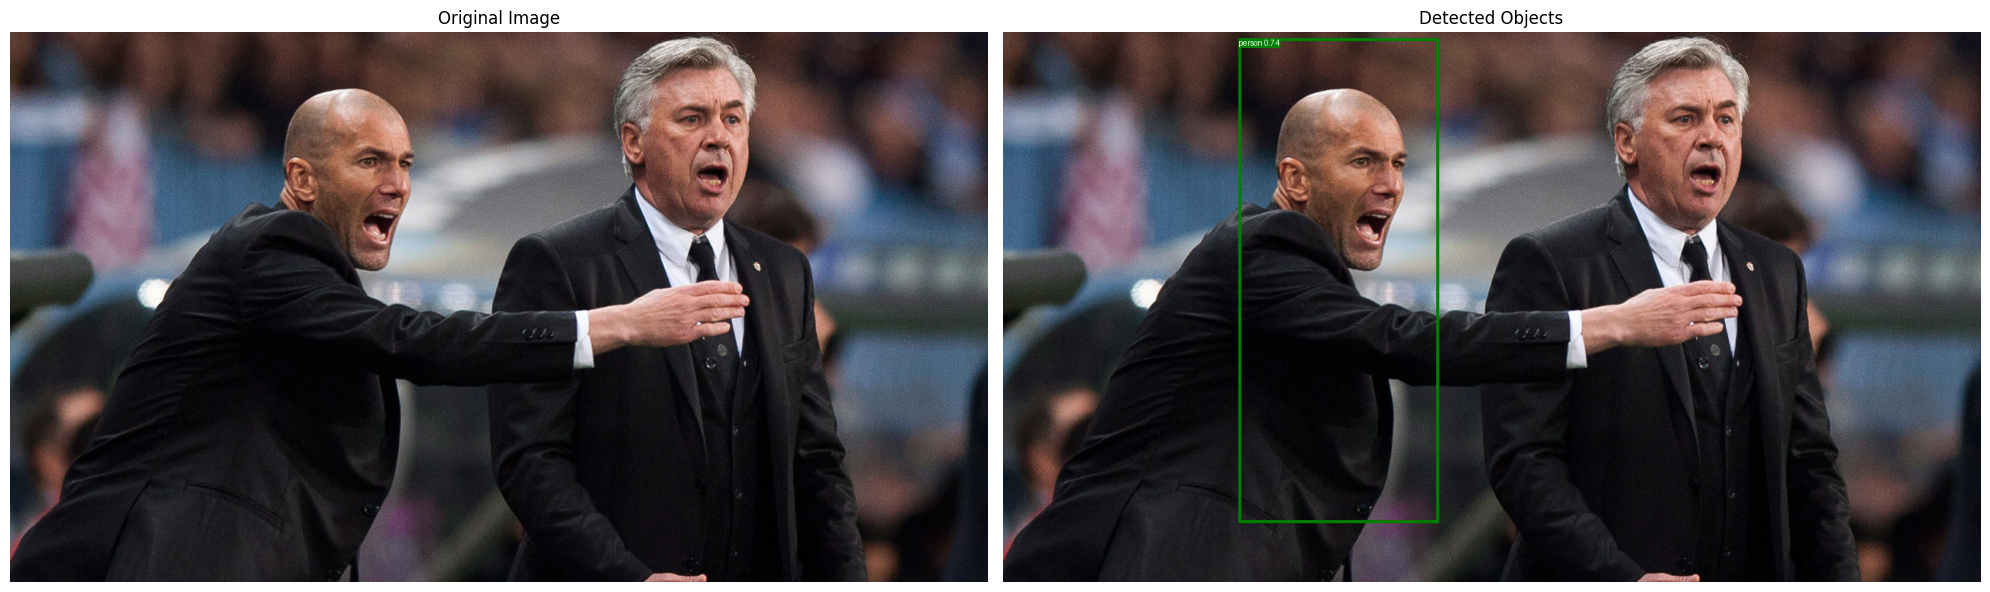

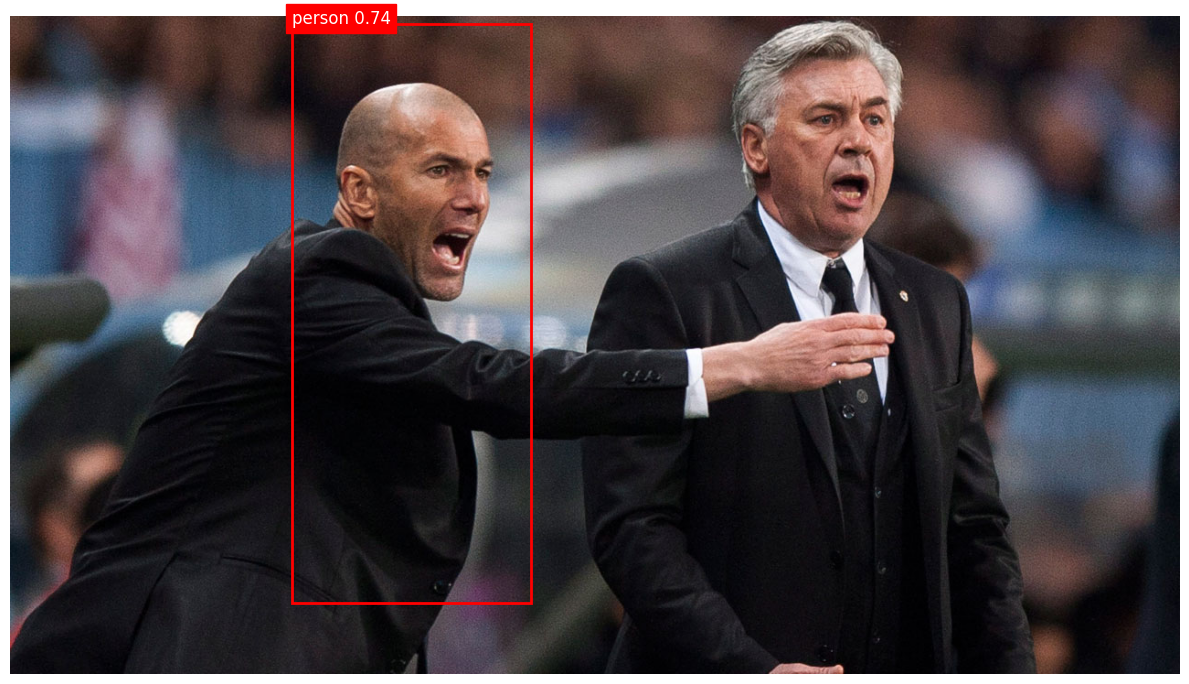

Detection Details:
Detection 1:
  Class: person
  Confidence: 0.7380
  Bounding Box: [308, 8, 570, 642]



In [13]:
# Process the image with custom thresholds
process_image(image_path, conf_thres=0.7, iou_thres=0.4)

## Troubleshooting Tips

If you're not getting the results you expect, try the following:

1. **No detections**: 
   - Lower the confidence threshold
   - Make sure the image is clear and objects are visible
   - Check if the image format is supported (JPEG, PNG)

2. **Too many detections**: 
   - Increase the confidence threshold
   - Decrease the IoU threshold

3. **Incorrect classifications**: 
   - The model might be confused by similar objects or unusual angles
   - Try using a clearer image or a different perspective

4. **API errors**: 
   - Check your internet connection
   - Ensure the image file is not too large (try resizing if necessary)
   - Verify that the API endpoint is correct and accessible

Remember, object detection models aren't perfect and may sometimes make mistakes or miss objects, especially in complex scenes or with unusual objects.

## Conclusion

This notebook demonstrates how to use the YOLOv8 detection API to perform object detection on images. You've learned how to:

1. Prepare and send an image to the API
2. Interpret and visualize the detection results
3. Adjust parameters to fine-tune the detection process
4. Troubleshoot common issues

Feel free to experiment with different images and parameters to see how the model performs in various scenarios. This can help you understand the strengths and limitations of the YOLOv8 object detection model.